# <span style="color:red">Seaborn | Part-14: PairGrid:</span>

Welcome to another important lecture on *Data Visualization with Seaborn*! Today our topic of interest is a **<span style="color:red">PairGrid</span>**, which shall be eventually followed up with **<span style="color:red">Pair Plot</span>**, that acts a companion function to **PairGrid**.

**PairGrid** acts as a very important tool in our arsenal because it returns a *subplot grid for plotting pairwise relationships in a dataset*. That is more like visualizing correlation between every critical feature of our dataset, depending upon what we choose to plot. The representation ideally has a **Histogram** plotted across it's *diagonal* and **Scatterplots** forming *triangles* above and below the *diagonal axes*.

The technique is often referred to as **"Panel Charts"** or even, **“lattice”**, or **“trellis”** plotting, and it is related to the idea of [Small multiples](https://en.wikipedia.org/wiki/Small_multiple). In general, our objective of using visualizations is to allow us to tap into our brain’s skill at interpreting visual complexity.  Human brain is better at interpreting visualizations that use fewer dimensions and by splitting up a big visualization into smaller and simpler visualizations, thus known as “small multiples”, the great skill of our brain, i.e. *understanding patterns* comes into play.

This visualization concept of **Small Multiples** was originally introduced by *Edward Tufte* (I hope I pronounced it correctly!). And he described these as: **"Illustrations of postage-stamp size are indexed by category or a label, sequenced over time, like the frames of a movie, or ordered by a quantitative variable, not used in the single image itself."** In simpler words, *small multiples* use the same basic graphic or chart to display different slices of a Pandas DataFrame, that are rich, multi-dimensional data points, without trying to cram all that information into a *single, overly-complex* chart.

Now let us try to *break-down the important features of PairGrid* that comes handy in resolving real-time data:

- They display multiple variables with less risk of confusing our audience (be it our clients/stakeholders). Because ideally, trying to draw three or more variables in a single chart is a challenge, that statistician *Stephen Few* once referred to as overplotting.
- Adience can quickly adapt to read an individual chart and apply this knowledge as they scan the rest of the charts. This also shifts our effort from understanding how the chart works, to what the DataFrame says.
- Finally we may say that *Small multiples* enable comparison across variables and reveal the range of potential patterns in our charts.

Now bigger question is to comprehend what we visualize because with any visualization, there are many ways to end up *undermining value of the data presentation* so let us try to figure out how Seaborn actually makes our life easier.

Once again, we shall import all our package and style dependancies that we've constantly been using throughout and then plot a simple **<span style="color:red">PairGrid</span>** using a built-in dataset, before getting into our discussion on available parameters.

In [109]:
# Importing dependancies:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="ocean")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

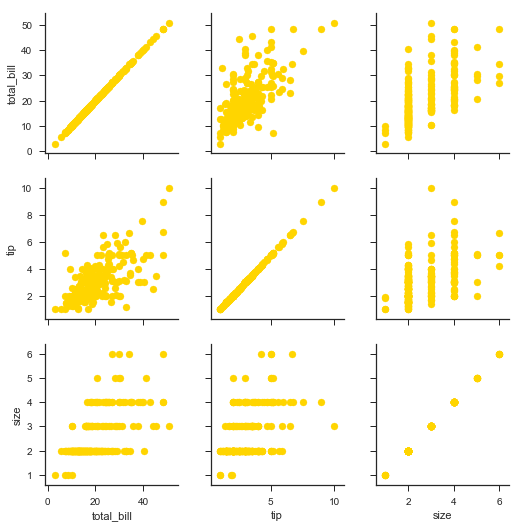

In [7]:
# Loading Built-in Dataset:
tips = sns.load_dataset("tips")

# Drafting a simple PairGrid plot:
ax = sns.PairGrid(tips)
ax.map(plt.scatter);

As visible, three important variables from our *Tips* DataFrame (and yes! we need to ensure that the dataset being inputted is a Pandas DataFrame) have been returned as subplots on this grid, plotted against each other. Even here, at first we initialize our grid, then pass plotting function to a `map` method, and that in turn gets called on each subplot. 

It is also intrinsic to understand the difference between a **FacetGrid** and a **PairGrid**. In *FacetGrid*, each facet shows the same relationship conditioned on different levels of other variables; whereas in *PairGrid*, each plot shows a different relationship (although as visible, our upper triangle very well epitomizes lower triangle). Using *PairGrid*, we may fetch a very quick and high-level summary of interesting relationships in our DataFrame.

In a **PairGrid**, each *row* and *column* is assigned to a different variable, so the resulting plot shows each *pairwise relationship* in our dataset. Note that this style of plot is sometimes also called as a **“Scatterplot matrix”**, being utmost common way to show each relationship; though it is certainly not limited to *Scatterplots*, and we shall see that shortly.

Let us now closely look at the parameters offered by Seaborn to aid in plotting **PairGrid()**:

`seaborn.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

To have a firmer grip on our plot, Seaborn seems to additionally provide us with options like `vars`, `x_vars` and `y_vars` that help us to further determine if we would like consider just a few selective features overall on the plot or on any particular axes. We are well acquainted with rest of the available parameters, so for further customization, we would be using respective plot params, and I shall demonstrate that very shortly. Inference is not actually a pain area for us anymore so let us once again, focus more on varieties available:

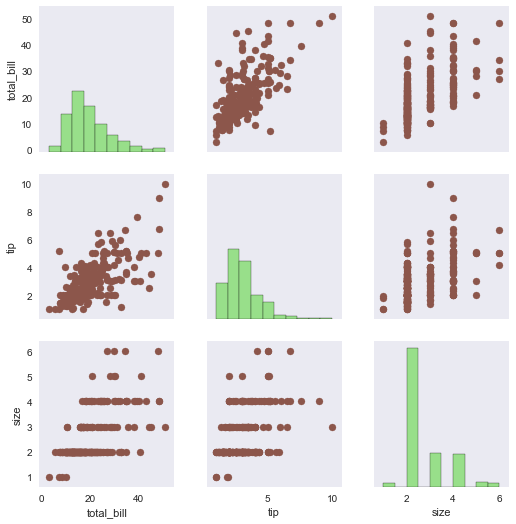

In [24]:
# Ensuring visible Edge lines:
plt.rcParams['patch.force_edgecolor'] = True

# Plotting our PairGrid:
ax1 = sns.PairGrid(tips)

# Let us now map Histogram to diagonals of our grid, & we shall call Matplotlib under cover:
ax1.map_diag(plt.hist, color=tableau_20[5])
ax1.map_offdiag(plt.scatter, color=tableau_20[10])

Hmm! That seems to do our job pretty well in presenting correlation between variables. Let us now try to use some other types of plots on some other DataFrame, and this we shall fetch a DataFrame from [Scikit-Learn](http://scikit-learn.org/) which is actually a *Machine Learning library* for *Python* language, featuring various *Classification, Regression and Clustering algorithms*:

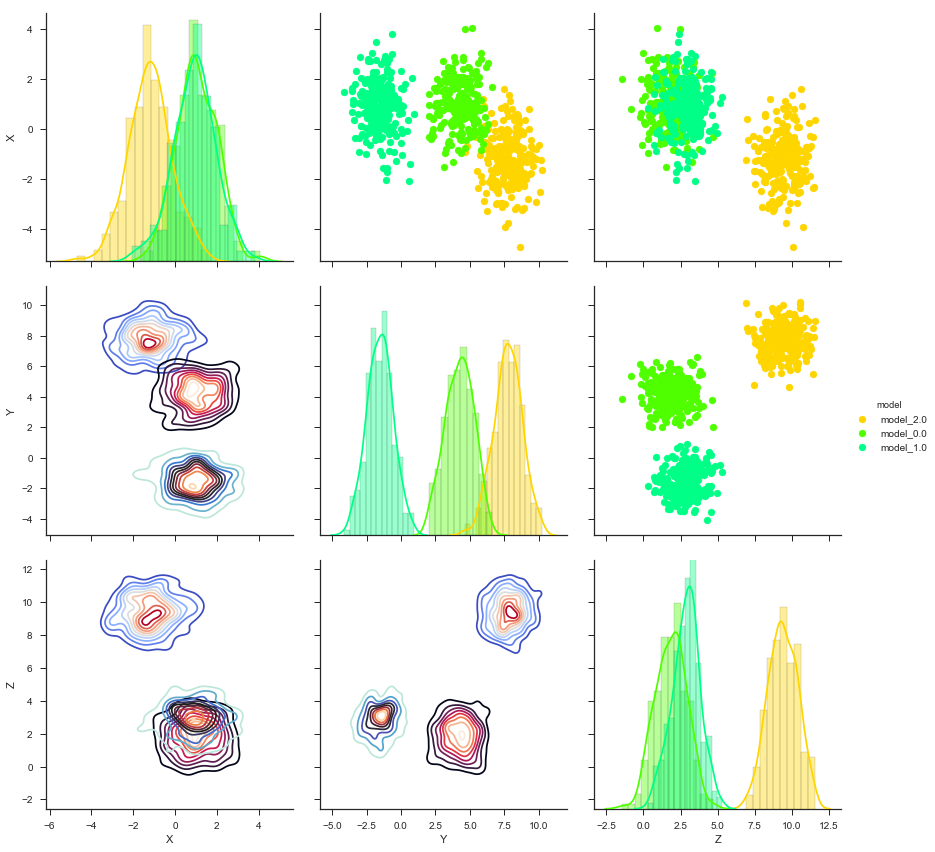

In [45]:
# Generating Data using Sklearn Blobs. Don't really have to focus on data generation:
n = 700
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=n, centers=3, n_features=3, random_state=0)

sample = pd.DataFrame(data= np.hstack([X, y[np.newaxis].T]), columns= ['X','Y','Z','model'])

# Distplot has a problem with the color being a number:
sample['model'] = sample['model'].map('model_{}'.format)

list_of_cmaps=['coolwarm','rocket','icefire','winter_r']

ax = sns.PairGrid(sample, hue='model', hue_kws={"cmap":list_of_cmaps}, size=4)

# Now we shall map Scatterplot to Upper & KDE Plot to Lower triangle while Distplot shall take diagonal axes:
ax.map_upper(plt.scatter)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.distplot)           # ax.map_diag(plt.hist) For a Histogram on diagonals.

# Let us also add a Legend:
ax.add_legend()

As you have noticed, we may either use `.map_offdiag()` or just use `.map_diag()` to refer to the triangles formed above and below the `diags`, i.e. the diagonals. And we also have the privilege to either map *Matplotlib* plots or *Seaborn* plots to our **Pairgrid**.

Let us now deal with a special case where we have a square grid with identity relationships on the diagonal axes, where we have freedom to plot with different variables in the *rows* and *columns*:

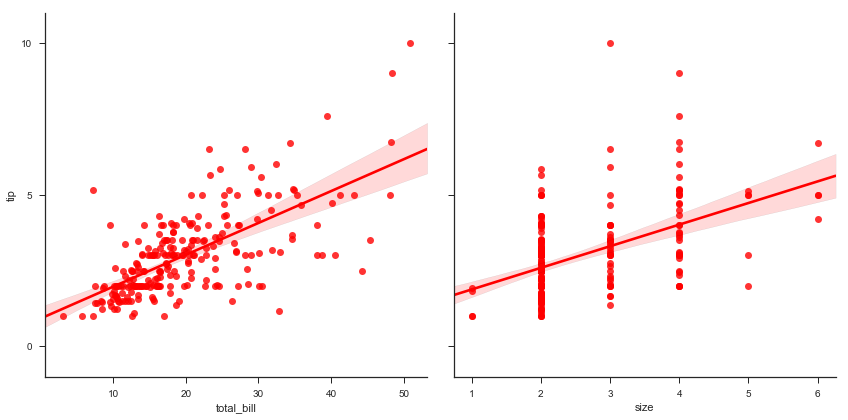

In [54]:
# Still working on our "Tips" Dataset:
ax2 = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=6)

ax2.map(sns.regplot, color='r')
ax2.set(ylim=(-1, 11), yticks=[0, 5, 10])

This plot isn't really something new for us as we have previously seen this while discussing **Regplot**, but I still wanted you to once again have a look at it. 

With that done, let us now move on to another dataset, i.e. Iris dataset to get better `hue` parameter specific plots:

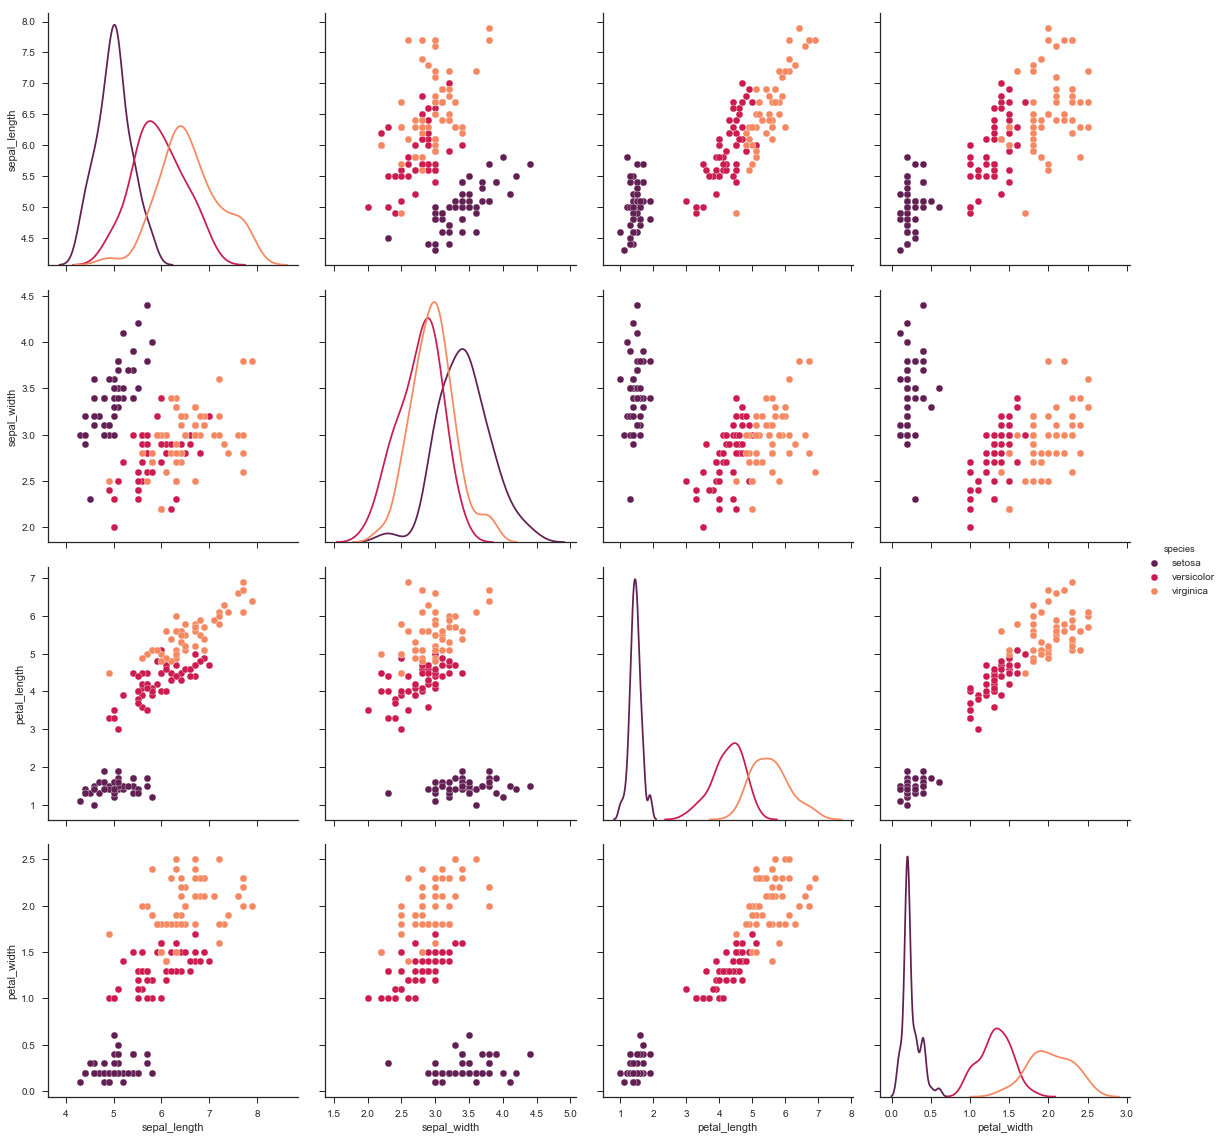

In [57]:
iris = sns.load_dataset('iris')

sns.pairplot(iris, hue="species", palette="rocket", diag_kind="kde", size=4)

Now how about a requirement where we only wish to draw the lower triangle on our grid thus excluding the area above diagonal axes, because anyways upper is a mirror of lower triangle. Let us try that on our *Iris* dataset:

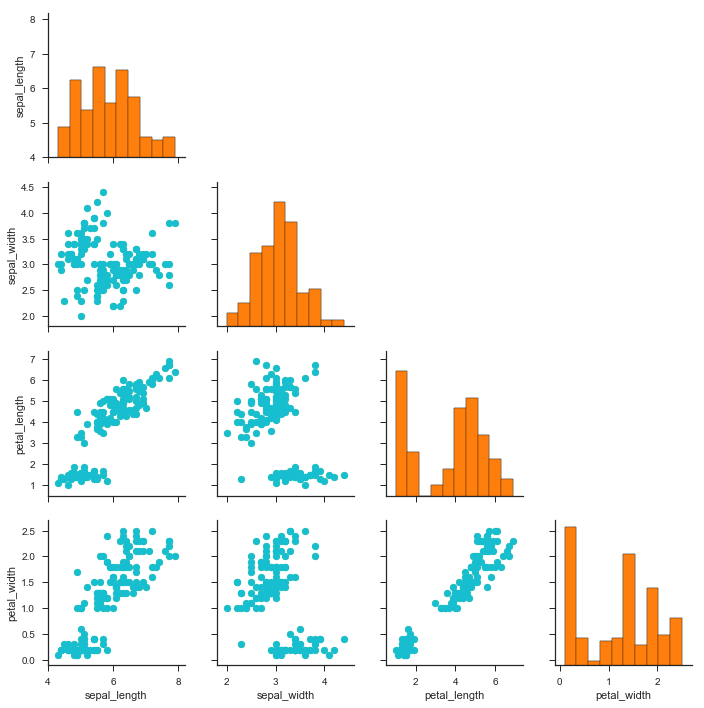

In [74]:
# We shall make little use of "NumPy" here:
ax4 = sns.pairplot(iris)
ax4.map_offdiag(plt.scatter, color=tableau_20[18])
ax4.map_diag(plt.hist, color=tableau_20[2])
for i, j in zip(*np.triu_indices_from(ax4.axes, 1)):
    ax4.axes[i, j].set_visible(False)

## Let us have little more fun: Let us now also remove the Diagonals from our Grid:   
#for ax in ax4.diag_axes: 
    #ax.set_visible(False)

That seems to be a handy option, isn't it? We don't know which way the requirements going to flow in, so it is better we remain prepared. Just to keep our learning process versatile enough, let me also show you a simple *statistical approach* with **PairGrids**, where we shall try to plot **Correlation Coefficient** as well for our plot on randon data points:

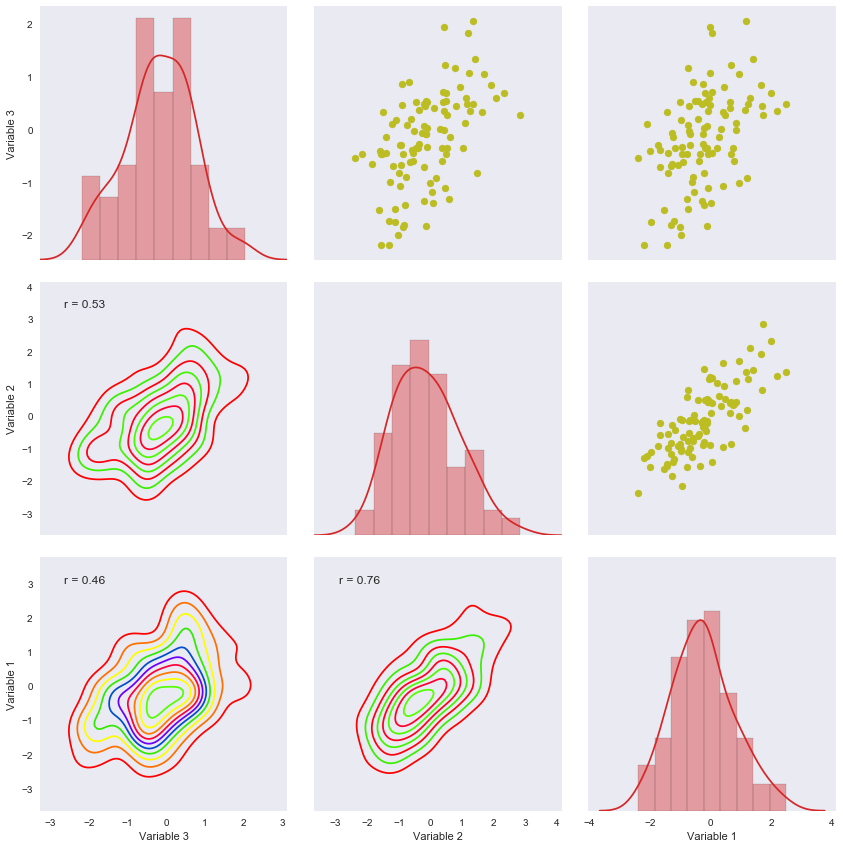

In [101]:
# Importing another library for statistical assistance:
from scipy import stats

# Declaring few variables to be plotted:
mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1

# Creating Dataset:
data = np.random.multivariate_normal(mean, cov, 100)
sample = pd.DataFrame(data, columns=["Variable 3", "Variable 2", "Variable 1"])

# Let us create a wrapper function to get our job done:
def corr_func(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.1, .9), xycoords=ax.transAxes)

ax5 = sns.PairGrid(sample, size=4)
ax5.map_upper(plt.scatter, color=tableau_20[16])
ax5.map_diag(sns.distplot, kde=True, color=tableau_20[6])
ax5.map_lower(sns.kdeplot, cmap="prism")
ax5.map_lower(corr_func)

I highly recommend to keep your Seaborn version above 0.8 or else you might face issues with hues on the diagonal of **PairGrid**. 

Let us now plot another *PairGrid* with some *random data points* and then try to play with the **size of those data points** in our Scatterplot:

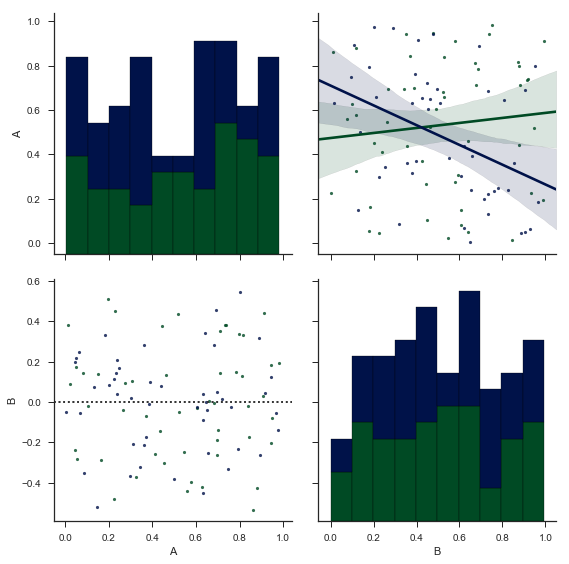

In [110]:
n = 100
category = pd.DataFrame(np.array(['a', 'b'])[np.random.randint(0, 2, size=[n,1])], columns=["Variables"], dtype="object")
data = pd.DataFrame(np.random.rand(n,2), columns=list('AB'))
sample = pd.concat([data,category], axis=1)

ax6 = sns.PairGrid(sample, hue="Variables", size=4)
ax6.map_diag(plt.hist)
ax6.map_upper(sns.regplot,scatter_kws={'s':10})

def size_func(*args, **kwargs): 
    if 'scatter_kws' in kwargs.keys():
        kwargs['scatter_kws'].update({"color": kwargs.pop("color")})
    sns.residplot(*args,**kwargs)
    
ax6.map_lower(size_func, scatter_kws={'s':10})

Here, we have been able to get the two classes to be coloured, whilst also being able to change the size of our data points. If I wouldn't have defined `size_func`, the two classes of our **Residplot** wouldn't be color-separated.

And with that, we shall here end our discussion on **PairGrid** and in our next lecture, we shall be discussing it's complimentary function, i.e. **Pair Plot**. Till then, keep practicing and *Happy Visualizing*!